# Proyek Predictive Analytics: [Dataset Saham LQ45 BBRI]
- **Nama:** [Aditiya Saputra]
- **Email:** [AditiyaS1811@gmail.com]
- **ID Dicoding:** [aditiya18]

Source Dataset : https://github.com/wildangunawan/Dataset-Saham-IDX/blob/master/Saham/LQ45/BBRI.csv

##Deskripsi Proyek

Proyek ini bertujuan untuk memprediksi pergerakan harga saham BBRI yang merupakan bagian dari indeks LQ45, dengan menggunakan metode predictive analytics berbasis machine learning. Dataset yang digunakan berisi data historis harga saham BBRI dari indeks LQ45 yang mencakup berbagai faktor seperti harga pembukaan, penutupan, tertinggi, terendah, serta volume perdagangan. Data ini digunakan untuk melatih model yang dapat memprediksi harga saham atau tren pergerakan harga di masa depan.

Langkah-langkah dalam proyek ini:
1.   Persiapan Data:
    *   Dataset saham BBRI diambil dari sumber terpercaya, lalu diproses untuk menangani nilai yang hilang dan memastikan kualitas data yang digunakan.
    *   Normalisasi dilakukan menggunakan MinMaxScaler untuk memastikan bahwa semua fitur berada dalam rentang yang konsisten, yang mempermudah proses pelatihan model.
    *   Split Data menjadi 80:20
2.   Pemodelan:
    *   Model yang digunakan adalah Long Short-Term Memory (LSTM), yang merupakan jenis jaringan saraf tiruan yang sangat efektif dalam memproses data sekuensial atau time series seperti harga saham.
    *   Proses pelatihan dilakukan untuk menemukan pola dalam data historis yang dapat digunakan untuk memprediksi harga saham BBRI di masa depan.
3.   Prediksi dan Visualisasi:
    *   Setelah model terlatih, digunakan untuk memprediksi harga saham BBRI
    *   Visualisasi hasil prediksi dibandingkan dengan harga saham aktual untuk mengevaluasi kinerja model secara visual.
4.   Evaluasi Model:
    *   Model dievaluasi menggunakan berbagai metrik, seperti MSE (Mean Squared Error) dan MAE (Mean Absolute Error),dan R2 Score untuk mengukur seberapa akurat prediksi yang dihasilkan oleh model.
    *   Perbandingan dilakukan dengan data validasi untuk menghindari overfitting dan memastikan generalisasi yang baik.

Tujuan Proyek:


*   Mengembangkan model prediktif yang dapat memberikan wawasan tentang kemungkinan pergerakan harga saham BBRI di masa depan.
*   Memberikan dasar yang kuat bagi pengambilan keputusan investasi berdasarkan data historis dan analisis prediktif.

Proyek ini tidak hanya meningkatkan pemahaman tentang penggunaan LSTM dalam analisis keuangan, tetapi juga menguji bagaimana teknik predictive analytics dapat diterapkan pada pasar saham untuk memprediksi tren harga dengan akurasi yang tinggi.






## Import Semua Packages/Library yang Digunakan

In [1]:
###install (Technical Analysis Library di Python)
!pip install ta
import pandas as pd ###manipulasi dan analisis data tabular
import numpy as np ###pengolahan data numerik
import matplotlib.pyplot as plt ###membuat visualisasi, grafik, dan plot data.
import seaborn as sns ### membuat visualisasi data yang lebih menarik dan informatif dengan lebih sedikit kode
import tensorflow as tf ### membangun model jaringan saraf tiruan (neural network) berbasis LSTM (Long Short-Term Memory)
from tensorflow import keras ###pembuatan dan pelatihan model jaringan saraf.
sns.set_style("whitegrid") ###latar belakang plot akan menjadi putih, dan grid akan ditampilkan di belakang plot
plt.style.use("fivethirtyeight") ###visualisasi data yang mirip dengan yang digunakan oleh FiveThirtyEight
from datetime import datetime ###impor fungsi datetime
from sklearn.preprocessing import MinMaxScaler ###import untuk normalisasi data
from keras.models import Sequential  ###import class untuk neural network
from keras.layers import Dense, LSTM ###Import dense untuk melakukan transformasi linier
import ta ###import technical analysis
import warnings ###mengendalikan pesan peringatan (warnings) yang dapat muncul selama eksekusi kode
warnings.filterwarnings("ignore") ###mengabaikan semua pesan peringatan yang mungkin muncul selama eksekusi kode
from datetime import date ###berguna untuk bekerja dengan tanggal dalam Python

## Data Preparation

### Data Loading

In [2]:
# URL GitHub untuk file CSV mentah
url = "https://raw.githubusercontent.com/wildangunawan/Dataset-Saham-IDX/master/Saham/LQ45/BBRI.csv"
# Membaca dataset
df = pd.read_csv(url)
# Menampilkan 5 baris pertama
print(df.head())

         date  previous  open_price  first_trade    high     low   close  \
0  2019-07-29    4440.0      4480.0       4480.0  4480.0  4440.0  4460.0   
1  2019-07-30    4460.0      4500.0       4500.0  4500.0  4460.0  4500.0   
2  2019-07-31    4500.0      4500.0       4500.0  4510.0  4450.0  4480.0   
3  2019-08-01    4480.0      4490.0       4490.0  4510.0  4410.0  4450.0   
4  2019-08-02    4450.0      4400.0       4400.0  4470.0  4390.0  4450.0   

   change       volume         value  ...  bid_volume  listed_shares  \
0    20.0   91877000.0  4.098494e+11  ...  10409200.0   1.221124e+11   
1    40.0   68755800.0  3.086996e+11  ...    468200.0   1.221124e+11   
2   -20.0  105834600.0  4.738443e+11  ...     16700.0   1.221124e+11   
3   -30.0  143626600.0  6.393417e+11  ...   1935200.0   1.221124e+11   
4     0.0  119342500.0  5.291418e+11  ...   2775800.0   1.221124e+11   

   tradeble_shares  weight_for_index  foreign_sell  foreign_buy  \
0     1.221124e+11      1.221124e+11    810

In [3]:
df.info()  #menampilkan informasi data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1355 non-null   object 
 1   previous               1355 non-null   float64
 2   open_price             1355 non-null   float64
 3   first_trade            1355 non-null   float64
 4   high                   1355 non-null   float64
 5   low                    1355 non-null   float64
 6   close                  1355 non-null   float64
 7   change                 1355 non-null   float64
 8   volume                 1355 non-null   float64
 9   value                  1355 non-null   float64
 10  frequency              1355 non-null   float64
 11  index_individual       1355 non-null   float64
 12  offer                  1355 non-null   float64
 13  offer_volume           1355 non-null   float64
 14  bid                    1355 non-null   float64
 15  bid_

Output dari df.info() menunjukkan bahwa DataFrame terdiri dari 1355 baris dan 25 kolom, yang sebagian besar berisi data bertipe float64 dan satu kolom bertipe object yaitu kolom date. Semua kolom kecuali delisting_date memiliki nilai non-null sebanyak 1355, artinya tidak ada nilai yang hilang di kolom-kolom tersebut. Namun, kolom delisting_date tidak memiliki satu pun nilai yang valid (0 non-null), sehingga kemungkinan besar kolom ini bisa dihapus karena tidak mengandung informasi yang berguna. Secara keseluruhan, informasi ini membantu dalam memahami struktur data, tipe data tiap kolom, dan apakah ada data yang hilang sebelum proses pembersihan atau analisis lebih lanjut.

In [4]:
df.describe() # menghasilkan statistik deskriptif ringkas dari DataFrame

,previous,open_price,first_trade,high,low,close,change,volume,value,frequency,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
count,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1.355000e+03,1.355000e+03,1355.000000,...,1.355000e+03,1.355000e+03,1.355000e+03,1.355000e+03,1.355000e+03,1.355000e+03,0.0,1.355000e+03,1.355000e+03,1355.000000
mean,4446.863469,4197.619926,4199.036900,4501.376384,4398.789668,4446.730627,-0.132841,1.732390e+08,7.558775e+11,24323.907011,...,3.107525e+06,1.392136e+11,1.392136e+11,8.467646e+10,9.232452e+07,8.804041e+07,NaN,2.181647e+07,9.628963e+10,51.078229
std,730.203842,1397.230485,1397.867472,725.655390,730.864361,730.186065,84.350311,1.079762e+08,4.636233e+11,17734.759515,...,5.569827e+06,1.358214e+10,1.358214e+10,3.545319e+10,6.902185e+07,6.213455e+07,NaN,2.648973e+07,1.159372e+11,72.027730
min,2170.000000,0.000000,0.000000,2270.000000,2160.000000,2170.000000,-350.000000,6.819800e+06,2.815051e+10,467.000000,...,0.000000e+00,1.221124e+11,1.221124e+11,4.173695e+10,1.200000e+03,1.775000e+06,NaN,3.580000e+02,1.480550e+06,2.000000
25%,4100.000000,4105.000000,4110.000000,4160.000000,4060.000000,4100.000000,-50.000000,1.023866e+08,4.524782e+11,13057.000000,...,2.429000e+05,1.221124e+11,1.221124e+11,4.790895e+10,5.017900e+07,4.880285e+07,NaN,5.366334e+06,2.193448e+10,15.000000
50%,4410.000000,4420.000000,4420.000000,4470.000000,4370.000000,4410.000000,0.000000,1.414913e+08,6.348975e+11,18609.000000,...,1.134300e+06,1.500434e+11,1.500434e+11,6.202973e+10,7.371290e+07,7.148940e+07,NaN,1.333502e+07,5.914452e+10,26.000000
75%,4840.000000,4850.000000,4845.000000,4880.000000,4800.000000,4840.000000,50.000000,2.062180e+08,9.317141e+11,29673.000000,...,3.741250e+06,1.500434e+11,1.500434e+11,1.221124e+11,1.072647e+08,1.089136e+08,NaN,2.696243e+07,1.194581e+11,60.500000
max,6400.000000,6350.000000,6350.000000,6450.000000,6350.000000,6400.000000,500.000000,8.726073e+08,4.367967e+12,192580.000000,...,9.703410e+07,1.503255e+11,1.503255e+11,1.502139e+11,6.513037e+08,6.685863e+08,NaN,2.409136e+08,1.234244e+12,696.000000


Perintah df.describe() digunakan untuk menghasilkan statistik deskriptif ringkas dari DataFrame, yang mencakup metrik-metrik penting seperti jumlah data (count), nilai rata-rata (mean), standar deviasi (std), nilai minimum (min), nilai kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max) untuk setiap kolom numerik. Statistik ini berguna untuk memahami distribusi, sebaran, serta kecenderungan data secara umum, sehingga dapat membantu dalam proses eksplorasi data, deteksi outlier, dan pengambilan keputusan terkait preprocessing atau pemodelan data.

In [5]:
df.isnull().sum()

,0
date,0
previous,0
open_price,0
first_trade,0
high,0
low,0
close,0
change,0
volume,0
value,0


Perintah df.isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang (null) di setiap kolom dalam DataFrame. Hasilnya akan menunjukkan berapa banyak data yang kosong pada masing-masing kolom, sehingga memudahkan kita dalam mengidentifikasi dan menangani data yang tidak lengkap, dalam konteks ini delisting_date memiliki 1355 kolom yang kosong atau null










### Data Preprocessing

### Menghapus Kolom yang tidak diperlukan atau memiliki nilai NULL

Dalam prediksi harga saham harian, hanya kolom yang secara langsung mencerminkan aktivitas pasar dan pergerakan harga yang dipertahankan, seperti date, open_price, high, low, close, volume, value, frequency, foreign_sell, dan foreign_buy, karena informasi ini relevan untuk analisis tren, volatilitas, dan sentimen pasar. Sementara itu, kolom seperti previous, first_trade, offer, bid, listed_shares, hingga non_regular_* dihapus karena bersifat redundan, statis, tidak relevan untuk prediksi jangka pendek, atau bahkan mengandung banyak nilai kosong sehingga tidak memberikan kontribusi signifikan pada model.

In [6]:
# Drop kolom yang tidak diperlukan
cols_to_drop = [
    'change',                # fitur turunan dari previous & close
    'index_individual',
    'offer', 'offer_volume',
    'bid', 'bid_volume',
    'listed_shares', 'tradeble_shares',
    'weight_for_index',
    'delisting_date',        # semuanya null
    'non_regular_volume', 'non_regular_value', 'non_regular_frequency'
]

df_cleaned = df.drop(columns=cols_to_drop)

# Tampilkan kolom setelah dibersihkan
print("\nKolom setelah dibersihkan:\n", df_cleaned.columns.tolist())

# Cek info ringkas setelah pembersihan
print("\nInfo dataframe setelah dibersihkan:")
df_cleaned.info()


Kolom setelah dibersihkan:
 ['date', 'previous', 'open_price', 'first_trade', 'high', 'low', 'close', 'volume', 'value', 'frequency', 'foreign_sell', 'foreign_buy']

Info dataframe setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1355 non-null   object 
 1   previous      1355 non-null   float64
 2   open_price    1355 non-null   float64
 3   first_trade   1355 non-null   float64
 4   high          1355 non-null   float64
 5   low           1355 non-null   float64
 6   close         1355 non-null   float64
 7   volume        1355 non-null   float64
 8   value         1355 non-null   float64
 9   frequency     1355 non-null   float64
 10  foreign_sell  1355 non-null   float64
 11  foreign_buy   1355 non-null   float64
dtypes: float64(11), object(1)
memory usage: 127.2+ KB


###Memastikan data ke format datetime dan diurutkan berdasarkan waktu.

kolom 'date' dikonversi ke format datetime agar dapat dikenali sebagai tipe data waktu oleh pandas. Setelah itu, data diurutkan berdasarkan tanggal secara menaik (ascending) untuk memastikan urutan kronologisnya benar. Kemudian, kolom 'date' disimpan ke dalam variabel terpisah (dates) agar tidak ikut diproses dalam langkah-langkah seperti normalisasi atau scaling yang hanya berlaku untuk data numerik. Langkah terakhir adalah mencetak beberapa baris awal dari DataFrame (df_cleaned) untuk memastikan perubahan telah diterapkan dengan benar.

In [7]:
# Konversi kolom 'date' ke datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Urutkan berdasarkan tanggal secara ascending
df_cleaned = df_cleaned.sort_values(by='date').reset_index(drop=True)

# Simpan kolom 'date' ke variabel terpisah agar tidak diskalakan
dates = df_cleaned['date']

# Cek hasilnya
print(df_cleaned.head())

        date  previous  open_price  first_trade    high     low   close  \
0 2019-07-29    4440.0      4480.0       4480.0  4480.0  4440.0  4460.0   
1 2019-07-30    4460.0      4500.0       4500.0  4500.0  4460.0  4500.0   
2 2019-07-31    4500.0      4500.0       4500.0  4510.0  4450.0  4480.0   
3 2019-08-01    4480.0      4490.0       4490.0  4510.0  4410.0  4450.0   
4 2019-08-02    4450.0      4400.0       4400.0  4470.0  4390.0  4450.0   

        volume         value  frequency  foreign_sell  foreign_buy  
0   91877000.0  4.098494e+11     7033.0    81038800.0   42272500.0  
1   68755800.0  3.086996e+11     5799.0    29698800.0   31106400.0  
2  105834600.0  4.738443e+11     6659.0    92869100.0   64220800.0  
3  143626600.0  6.393417e+11    12051.0    85420900.0   64853300.0  
4  119342500.0  5.291418e+11     7231.0    65417900.0   68705400.0  


In [8]:
# Hanya kolom numerik yang akan dinormalisasi
features = ['open_price', 'high', 'low', 'close']

# Simpan kolom tanggal (pastikan kolom tanggal sudah ada dan bernama 'date')
dates = df_cleaned[['date']].copy()

# Salin data numerik untuk penskalaan
features_scaled = df_cleaned[features].copy()

# Normalisasi menggunakan MinMaxScaler
MMS = MinMaxScaler()
features_scaled_scaled = MMS.fit_transform(features_scaled)

# Konversi hasil scaling ke DataFrame kembali dengan kolom yang sesuai
features_scaled_df = pd.DataFrame(features_scaled_scaled, columns=features)

# Gabungkan kembali kolom tanggal dengan data yang telah dinormalisasi
df_scaled = pd.concat([dates.reset_index(drop=True), features_scaled_df.reset_index(drop=True)], axis=1)

# Tampilkan 5 data pertama
print(df_scaled.head())

        date  open_price      high       low     close
0 2019-07-29    0.705512  0.528708  0.544153  0.541371
1 2019-07-30    0.708661  0.533493  0.548926  0.550827
2 2019-07-31    0.708661  0.535885  0.546539  0.546099
3 2019-08-01    0.707087  0.535885  0.536993  0.539007
4 2019-08-02    0.692913  0.526316  0.532220  0.539007


Feature Engineering dan melakukan normalisasi pada kolom-kolom numerik tertentu dalam dataset agar nilainya berada dalam rentang yang seragam, biasanya antara 0 dan 1, menggunakan metode MinMaxScaler. Kolom yang dinormalisasi adalah 'open_price', 'high', 'low', dan 'close', yang semuanya berkaitan dengan harga saham. Proses ini dilakukan dengan tetap memisahkan kolom 'date' agar tidak ikut terpengaruh oleh normalisasi. Setelah dinormalisasi, data dikonversi kembali menjadi DataFrame dan digabungkan lagi dengan kolom tanggal, sehingga menghasilkan dataset baru (df_scaled) yang siap digunakan untuk pemodelan atau visualisasi dengan nilai-nilai yang sudah berskala.

In [9]:
df_scaled.shape # mengetahui dimensi dari DataFrame

(1355, 5)

In [10]:
#digunakan untuk pelatihan (training size) dalam konteks pembagian data menjadi data pelatihan dan data pengujian (training and testing data) 80%:20%
training_size = round(len(df_scaled) * 0.80)
training_size

1084

menentukan ukuran data pelatihan (training set) dengan mengambil 80% dari total jumlah data. Fungsi len(df_scaled) menghitung jumlah total baris, lalu dikalikan 0.80 untuk mendapatkan 80 persennya, dan hasilnya dibulatkan menggunakan round() agar menjadi angka bulat. Nilai ini nantinya akan digunakan untuk memisahkan data menjadi data pelatihan dan data pengujian (testing).

In [11]:
#split data
train_data = df_scaled[:training_size] #data train
test_data  = df_scaled[training_size:] #data test

train_data.shape, test_data.shape    #train dan tes tetap berjumlah 4 kolom dari shape

((1084, 5), (271, 5))

Train dates : 2019-07-29 --- 2023-12-29  (n=1084)
Test dates  : 2024-01-02 --- 2025-02-21  (n=271)



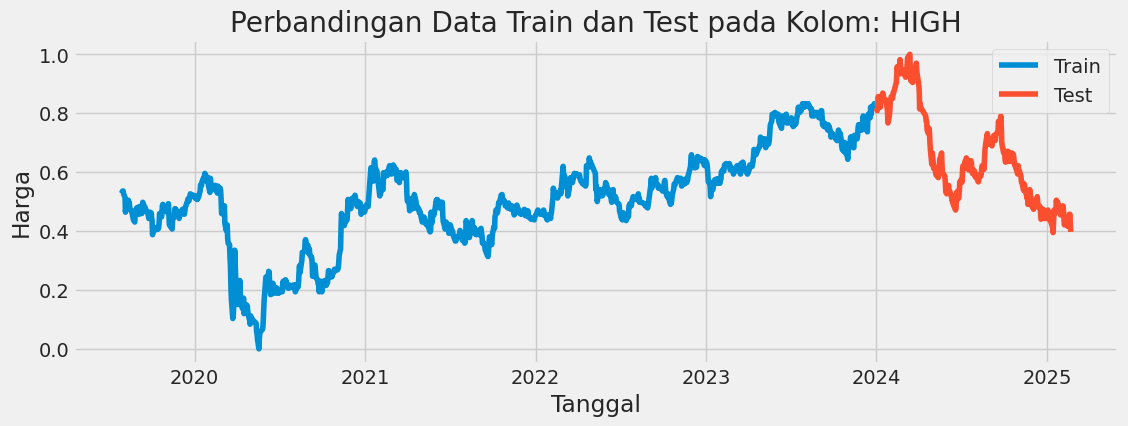

In [12]:
# Split data menjadi train dan test
# ************************************************************************************************

size = 271  # jumlah hari terakhir untuk test data
train_data = df_scaled[:-size].copy()
test_data = df_scaled[-size:].copy()

# Pastikan kolom 'date' menjadi index agar plot berdasarkan waktu
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

# Tampilkan rentang tanggal dari train dan test
print(f"Train dates : {train_data.index.min().date()} --- {train_data.index.max().date()}  (n={len(train_data)})")
print(f"Test dates  : {test_data.index.min().date()} --- {test_data.index.max().date()}  (n={len(test_data)})")
print()

# Visualisasi data train dan test
# ************************************************************************************************

col = 'high'  # kolom yang ingin divisualisasikan
plt.figure(figsize=(12, 4))
plt.plot(train_data[col], label='Train')
plt.plot(test_data[col], label='Test')
plt.title(f'Perbandingan Data Train dan Test pada Kolom: {col.upper()}')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()


 Visualisasi tersebut membantu memahami sejauh mana cakupan data train dan test serta melihat perbandingan tren harga pada kolom tertentu (dalam hal ini kolom 'high') dari waktu ke waktu.

In [13]:
def create_sequence(dataset):
    """
    Membuat urutan sequence dan label dari dataset time series.

    Args:
    - dataset: DataFrame, data time series yang sudah dinormalisasi (tanpa kolom tanggal)

    Returns:
    - sequences: array berisi urutan data (X)
    - labels: array berisi target/label prediksi (y)
    """
    sequences = []  # untuk menyimpan urutan data input (fitur)
    labels = []     # untuk menyimpan data target (label)

    start_idx = 0  # indeks awal dari urutan data

    # Loop dimulai dari 50 (ukuran jendela/sequence) hingga akhir dataset
    for stop_idx in range(50, len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx].values)
        labels.append(dataset.iloc[stop_idx].values)  # ambil 1 baris sebagai label (biasanya kolom 'close' saja)
        start_idx += 1  # geser jendela ke depan

    return np.array(sequences), np.array(labels)

In [14]:
#membuat urutan data pelatihan (training data) dan pengujian (testing data)
X_train, y_train = create_sequence(train_data)
X_test, y_test = create_sequence(test_data)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape # shape memeriksa jumlah baris dan kolom setelah di split

((1034, 50, 4), (1034, 4), (221, 50, 4), (221, 4))

## Modelling

Membangun sebuah model deep learning dengan arsitektur Long Short-Term Memory (LSTM) menggunakan Sequential dari Keras, yang dirancang khusus untuk menangani data deret waktu seperti prediksi harga saham. Model ini terdiri dari empat lapisan LSTM berurutan, masing-masing dengan 50 unit neuron; tiga lapisan pertama menggunakan return_sequences=True untuk mengirim output ke lapisan berikutnya, sedangkan lapisan terakhir tidak mengembalikan urutan karena langsung terhubung ke lapisan output. Setiap lapisan LSTM diikuti oleh lapisan Dropout dengan rasio 0.2 guna mengurangi overfitting. Lapisan terakhir adalah Dense yang berfungsi sebagai output layer, diatur dengan units=4 untuk memprediksi empat nilai sekaligus. Model dikompilasi menggunakan optimizer Adam, dengan fungsi kerugian mean_squared_error dan metrik tambahan mean_absolute_error untuk mengevaluasi performa model secara lebih detail.

In [16]:
from tensorflow.keras.layers import LSTM, Dropout, Dense

 #Membuat objek Sequential sebagai model
regressor = Sequential()

# Menambahkan lapisan LSTM pertama dengan 50 unit dan return_sequences=True untuk layer berantai
# Dropout digunakan untuk menghindari overfitting (mengabaikan 20% neuron secara acak selama training)
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# LSTM layer ke-2
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# LSTM layer ke-3
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# LSTM layer ke-4 (terakhir), return_sequences=False karena tidak ada lagi LSTM setelah ini
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Output layer - Dense, units=4 jika kamu ingin prediksi 4 langkah ke depan
# Jika hanya 1 langkah (misalnya harga close keesokan hari), ubah jadi units=1
regressor.add(Dense(units=4))

# Kompilasi model dengan optimizer Adam dan loss fungsi MSE (Mean Squared Error)
# Ditambahkan juga metric MAE untuk melihat performa lebih jelas
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Melihat ringkasan arsitektur model
print(regressor.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,804 (280.48 KB)

 Trainable params: 71,804 (280.48 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
history = regressor.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 166ms/step - loss: 0.1193 - mean_absolute_error: 0.2676 - val_loss: 0.0072 - val_mean_absolute_error: 0.0703
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.0161 - mean_absolute_error: 0.0988 - val_loss: 0.0044 - val_mean_absolute_error: 0.0540
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0129 - mean_absolute_error: 0.0876 - val_loss: 0.0050 - val_mean_absolute_error: 0.0597
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0113 - mean_absolute_error: 0.0832 - val_loss: 0.0037 - val_mean_absolute_error: 0.0497
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0111 - mean_absolute_error: 0.0826 - val_loss: 0.0044 - val_mean_absolute_error: 0.0521
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0097 - mean_absolute_error: 0.0753 - val_loss: 0.0037 - val_mean_absolute_error: 0.0476
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0079 - mean_absolute_error: 0.0682 - v

## Evaluasi dan Visualisasi

 Membuat prediksi menggunakan model LSTM (regressor) terhadap data pengujian (X_test). Hasil prediksi disimpan dalam variabel test_predicted, dan kemudian ditampilkan 5 hasil prediksi pertama.

In [18]:
#membuat prediksi berdasarkan data pengujian (test data) 5 data pertama
test_predicted = regressor.predict(X_test)
test_predicted[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


array([[0.98040915, 0.9308781 , 0.92293435, 0.9170046 ],
       [0.9705658 , 0.92051435, 0.91263115, 0.9071673 ],
       [0.960868  , 0.91054094, 0.9028755 , 0.89771616],
       [0.95504797, 0.90478814, 0.89746666, 0.8923092 ],
       [0.9535003 , 0.903514  , 0.8965714 , 0.8911965 ]], dtype=float32)

Dari Hasil diatas Kolom pertama adalah high_predicted, low_predicted, open_predicted, close_predicted

In [19]:
# mengambil data hasil prediksi yang telah disesuaikan dengan scaling dan mengembalikannya ke dalam skala aslinya
test_inverse_predicted = MMS.inverse_transform(test_predicted) # inversing scaling predidksi data
test_inverse_predicted[:5]

array([[6225.598 , 6161.0703, 6027.0947, 6048.9297],
       [6163.093 , 6117.75  , 5983.925 , 6007.318 ],
       [6101.5117, 6076.061 , 5943.0483, 5967.3394],
       [6064.5547, 6052.0146, 5920.3857, 5944.468 ],
       [6054.7266, 6046.6885, 5916.6343, 5939.761 ]], dtype=float32)

Dari Hasil diatas Kolom pertama adalah high_predicted, low_predicted, open_predicted, close_predicted

In [20]:
#menggabungkan (merge) dua set data menggunakan perpustakaan Pandas (pandas.concat).

merge_data = pd.concat([df_scaled.iloc[-221:].copy(),pd.DataFrame(test_inverse_predicted,columns=['high_predicted','low_predicted','open_predicted','close_predicted'],index=df_scaled.iloc[-221:].index)], axis=1)

In [21]:
# memungkinkan  untuk membandingkan prediksi dengan data historis dengan lebih mudah dalam konteks skala aslinya
merge_data[['high','low','open_price','close']] = MMS.inverse_transform(merge_data[['high','low','open_price','close']]) # Inverse scaling

In [22]:
merge_data.head() #mengetahui beberapa barus pertama dari dataframe

,date,open_price,high,low,close,high_predicted,low_predicted,open_predicted,close_predicted
1134,2024-03-19,6119.055118,5742.344498,6075.894988,6000.0,6225.598145,6161.070312,6027.094727,6048.929688
1135,2024-03-20,6119.055118,5818.301435,6100.835322,6100.0,6163.092773,6117.750000,5983.924805,6007.317871
1136,2024-03-21,6234.527559,5970.215311,6200.596659,6100.0,6101.511719,6076.061035,5943.048340,5967.339355
1137,2024-03-22,6152.047244,5856.279904,6150.715990,6125.0,6064.554688,6052.014648,5920.385742,5944.467773
1138,2024-03-25,6218.031496,6046.172249,6225.536993,6250.0,6054.726562,6046.688477,5916.634277,5939.761230


DataFrame merge_data yang ditampilkan berisi gabungan antara data harga historis asli dan hasil prediksi model, yang sudah dikembalikan ke skala harga sebenarnya (melalui inverse scaling). Setiap baris mewakili satu tanggal tertentu, dan setiap kolom memiliki arti sebagai berikut:
*   date: tanggal data tersebut dicatat.
*   open_price, high, low, close: nilai aktual harga pembukaan, harga tertinggi, harga terendah, dan harga penutupan pada hari tersebut.
*   open_predicted, high_predicted, low_predicted, close_predicted: nilai hasil prediksi model untuk harga pembukaan, tertinggi, terendah, dan penutupan pada tanggal yang sama.

Dengan adanya dua set nilai (aktual dan prediksi), DataFrame ini memudahkan kita untuk mengevaluasi performa model, misalnya dengan menghitung error atau melakukan visualisasi perbandingan antara harga aktual dan prediksi.




##Visualisasi Actual Price dan Prediction Price

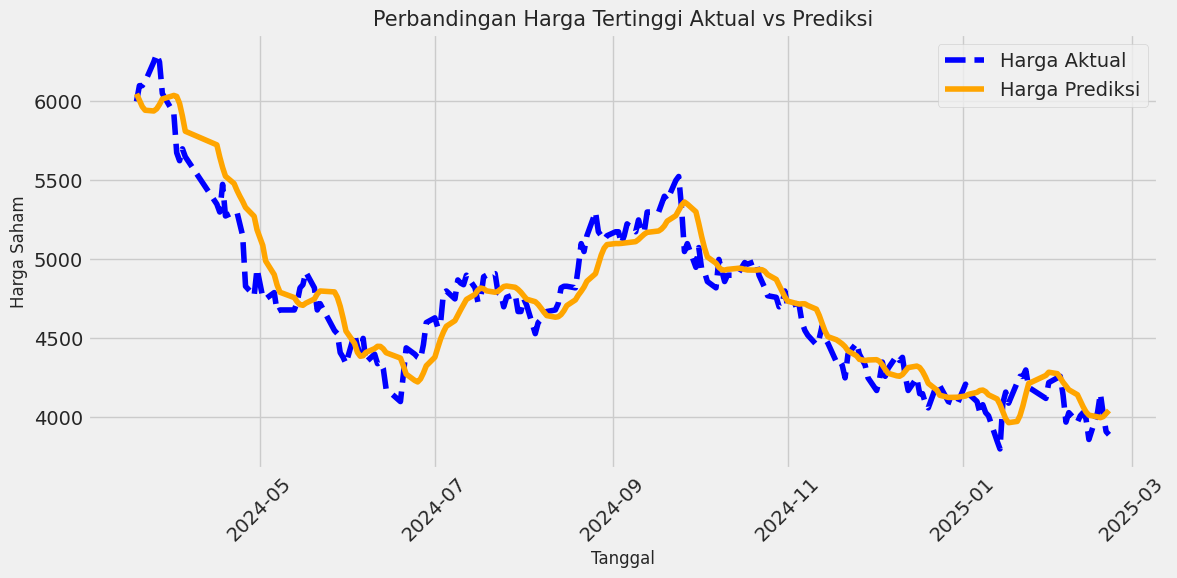

In [23]:
# Pastikan kolom 'date' jadi index (datetime), jika belum
merge_data['date'] = pd.to_datetime(merge_data['date'])
merge_data.set_index('date', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(merge_data['close'], label='Harga Aktual', color='blue', linestyle='dashed')
ax.plot(merge_data['close_predicted'], label='Harga Prediksi', color='orange')

# Format tampilan
ax.set_title('Perbandingan Harga Tertinggi Aktual vs Prediksi', fontsize=15)
ax.set_xlabel('Tanggal', fontsize=12)
ax.set_ylabel('Harga Saham', fontsize=12)
plt.xticks(rotation=45)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Evaluasi Model MSE, RMSE, R2 SCORE

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_predicted)
print("Mean Squared Error (MSE):", mse)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Menghitung R-squared (R2) score
r2 = r2_score(y_test, test_predicted)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.0012070822955819007
Root Mean Squared Error (RMSE): 0.03474308989686871
R-squared (R2) Score: 0.9008055784632566


Evaluasi model menggunakan tiga metrik yaitu Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R²) Score memberikan gambaran tentang seberapa baik model memprediksi harga:
*   MSE (0.0012) menunjukkan rata-rata kuadrat selisih antara nilai aktual dan nilai prediksi. Nilai yang kecil mengindikasikan bahwa prediksi model cukup dekat dengan data asli.
*   RMSE (0.0347) merupakan akar dari MSE, yang menyatakan rata-rata kesalahan dalam satuan aslinya (misalnya harga dalam ribuan rupiah). Nilai ini juga tergolong kecil, artinya prediksi tidak jauh menyimpang.
*   R² Score (0.9008) mengukur seberapa baik variasi dalam data bisa dijelaskan oleh model. Nilai mendekati 1 (maksimal) berarti model sangat baik dalam menjelaskan variasi data.

Kesimpulan: Model LSTM yang digunakan memiliki performa prediksi yang baik, dengan error yang kecil dan tingkat penjelasan yang tinggi terhadap data aktual (R² = 90%). Artinya, model ini mampu memprediksi pergerakan harga dengan akurasi yang cukup tinggi.


